In [5]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

DATA_DIR = os.path.join("data_raw")
FORK_DIR = os.path.join(DATA_DIR, "forklift", "Lithium-ion battery degradation dataset based on a realistic forklift operation profile")


def convert_size(size_bytes):
    # Convert bytes to KB, MB, GB, TB
    power = 1024
    size_types = ["B", "KB", "MB", "GB", "TB"]
    size = size_bytes / power
    i = 0
    while size >= power:
        size /= power
        i += 1
    return "{:.2f} {}".format(size, size_types[i])


In [8]:
CELL = 1
CELL_DIR = os.path.join(FORK_DIR, f"Cell{CELL}")

rounds = os.listdir(CELL_DIR)
rounds.sort()
rpt = pd.DataFrame()
age = pd.DataFrame()
for r in tqdm(rounds[:40], "Reading files"):
    csv_files = os.listdir(os.path.join(CELL_DIR, r))
    if (n := "RPT.csv") in csv_files:
        rpt = pd.concat([rpt, pd.read_csv(os.path.join(CELL_DIR, r, n))])
    if (n := "Ageing.csv") in csv_files:
        age = pd.concat([age, pd.read_csv(os.path.join(CELL_DIR, r, n))])

display(rpt)
display(age)
print(f"RPT: {convert_size(rpt.memory_usage(deep=True).sum())}")
print(f"AGE: {convert_size(age.memory_usage(deep=True).sum())}")


,Cell,Round,Time,Current,Voltage,Energy,Temperature
0,1,0,0.150,0.0,3.3378,0.00,24.754
1,1,0,1.178,0.0,3.3378,0.00,24.754
2,1,0,2.095,0.0,3.3378,0.00,24.878
3,1,0,12.107,0.0,3.3378,0.00,24.893
4,1,0,22.105,0.0,3.3378,0.00,24.863
...,...,...,...,...,...,...,...
98420,1,40,125027.560,0.0,3.3600,243.39,26.000
98421,1,40,125037.545,0.0,3.3600,243.39,26.000
98422,1,40,125037.571,0.0,3.3600,243.39,26.000
98423,1,40,125037.586,0.0,3.3600,243.39,26.000


,Cell,Round,Part,Time,Current,Voltage,Energy,Temperature
0,1,1,1.0,0.000,0.0000,3.3383,0.0000,44.862
1,1,1,1.0,3.133,-2.9977,3.3378,-0.0027,44.892
2,1,1,1.0,4.126,-20.9992,3.3341,-0.0200,44.892
3,1,1,1.0,5.146,-44.9995,3.3289,-0.0605,44.847
4,1,1,1.0,6.120,-32.9985,3.3305,-0.0885,44.847
...,...,...,...,...,...,...,...,...
589041,1,40,2.0,593141.725,20.0000,3.3500,175.6100,45.000
589042,1,40,2.0,593142.706,20.0000,3.3500,175.6200,45.000
589043,1,40,2.0,593143.716,20.0000,3.3500,175.6400,45.000
589044,1,40,2.0,594054.719,0.0000,3.3200,175.6400,44.900


RPT: 244.20 KB
AGE: 1.43 MB


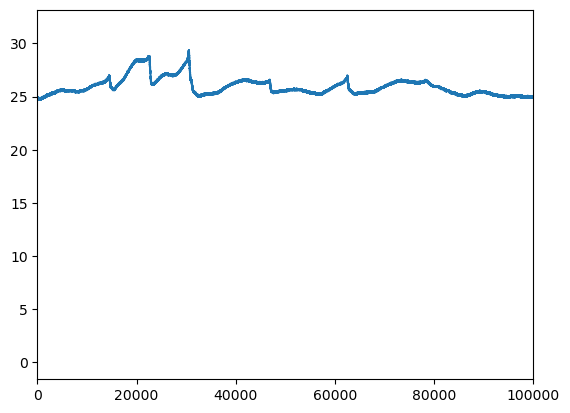

In [15]:
fig, ax = plt.subplots()

ax.plot(rpt["Temperature"].to_numpy())
ax.set_xlim(0, 1e5)

plt.show()
